In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

## Step 1. Halfin_Whitt_function and show the relationship between α and c

In [29]:
def Halfin_Whitt_function(c):
    alpha = (1 + c*norm.cdf(c)/norm.pdf(c))**(-1)
    return alpha

In [30]:
def plot_fig_3():
    c_list = [3*i/2000 for i in range(2000)]
    alpha_list = []
    for c in c_list:
        alpha = Halfin_Whitt_function(c)
        alpha_list.append(alpha)
        if abs(alpha - 1) < 1e-3:
            print("α: ", alpha, "  c: ", c )
        if abs(alpha - 0.7) < 1e-3:
            print("α: ", round(alpha, 2), "  c: ", round(c, 2))
        if abs(alpha - 0.5) < 1e-3:
            print("α: ", round(alpha, 2), "  c: ", round(c, 2))
        if abs(alpha - 0.3) < 1e-3:
            print("α: ", round(alpha, 2), "  c: ", round(c, 2))
        if abs(alpha - 0.1) < 1e-3:
            print("α: ", round(alpha, 2), "  c: ", round(c, 2))
    
    plt.figure(figsize=(8,6), dpi=100)
    plt.plot(c_list, alpha_list)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("α")
    plt.xlabel("c")
    plt.title("Halfin_Whitt_function")
    plt.grid()
    plt.show()

α:  1.0   c:  0.0
α:  0.7   c:  0.27
α:  0.5   c:  0.51
α:  0.5   c:  0.51
α:  0.3   c:  0.83
α:  0.3   c:  0.83
α:  0.1   c:  1.42
α:  0.1   c:  1.42
α:  0.1   c:  1.42
α:  0.1   c:  1.42
α:  0.1   c:  1.42
α:  0.1   c:  1.42
α:  0.1   c:  1.43


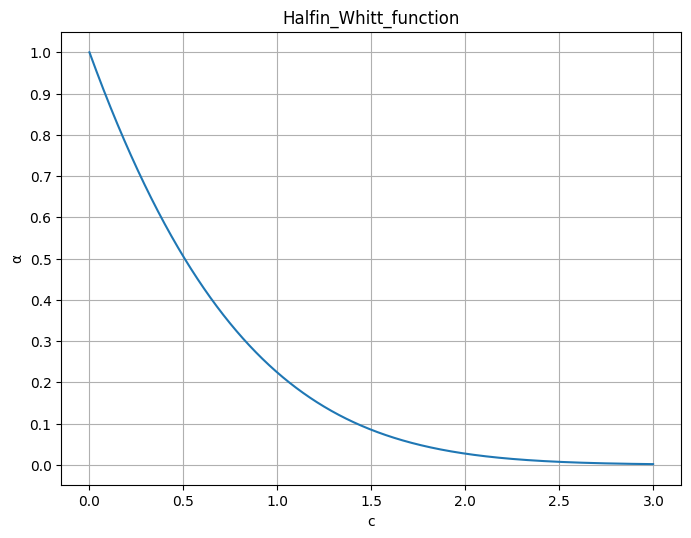

In [31]:
plot_fig_3()

## Step 2. Implement Algorithm 1 

### Parameter setting

In [32]:
N = 10
p_e = 50
lambda_n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
#lambda_n_list = [6 for i in range(10)] 
lambda_n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
#lambda_n = [6 for i in range(10)] 
mu_n = 1
D_u = 1
p_u = 0.05
s_u = 1
c_e = 1
###
k_n = 10
alpha_dict = {1.0:0.0, 0.7:0.27, 0.5:0.51, 0.3:0.83, 0.1:1.42}

In [33]:
def algo_1(alpha, pri = False):
        
    c = alpha_dict[alpha]
    lambda_T = sum(lambda_n_list)
    mu_T = mu_n
    R_T = lambda_T / mu_T
    k_T = R_T + c * (R_T**0.5)
    
    n_s = np.floor((N*k_n-k_T)/k_n)
    x_n = [1 for i in range(N)]
    n = 1
    lambda_off = 0
    if pri:
        print("For k_n=", k_n, "  mu_n=", mu_n, "  α =", alpha)
        print("lambda_n_list: ", lambda_n_list)
        print("k_T: ", k_T)
        print("n_s: ", n_s)
    n_on = [i+1 for i in range(N)]
    # edge devices with the lightest traffic load 
    # (to reduce the cost of task migration that is not considered in this work) 
    # will enter the Off mode
    while n <= n_s:
        min_lambda_n = min(lambda_n)
        #index = lambda_n_list.index(min_lambda_n)
        lambda_n.remove(min_lambda_n)
        #n_on.remove(index)
        n_on = n_on[1:]
        x_n[n-1] = 0
        lambda_off = lambda_off + min_lambda_n
        n = n + 1
    if pri:
        print("==== Before offload ====")
        #print("lambda_n_list: ", lambda_n_list)
        print("lambda_n: ", lambda_n)
        print("n_on: ", n_on)
        print("x_n: ", x_n)
        print("lambda_off: ", lambda_off)
    
    # sort
    # the traffic offloaded from sleeping edge devices will be accommodated 
    # by active edge devices with the lightest load
    n = 1
    while lambda_off > 0:
        lambda_q = min(lambda_off, k_n*mu_n-lambda_n[n-1])
        lambda_n[n-1] = lambda_n[n-1] + lambda_q
        lambda_off = lambda_off - lambda_q
        n = n + 1
    if pri:
        print("==== After offload ====")
        #print("lambda_n_list: ", lambda_n_list)
        print("lambda_n: ", lambda_n)
        print("n_on: ", n_on)
        print("x_n: ", x_n)
        print("lambda_off: ", lambda_off)
    return lambda_n_list, lambda_n, n_on, x_n, lambda_off

In [34]:
algo_1(0.5, pri = True)

For k_n= 10   mu_n= 1   α = 0.5
lambda_n_list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k_T:  58.78226122841879
n_s:  4.0
==== Before offload ====
lambda_n:  [5, 6, 7, 8, 9, 10]
n_on:  [5, 6, 7, 8, 9, 10]
x_n:  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
lambda_off:  10
==== After offload ====
lambda_n:  [10, 10, 8, 8, 9, 10]
n_on:  [5, 6, 7, 8, 9, 10]
x_n:  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
lambda_off:  0


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [10, 10, 8, 8, 9, 10],
 [5, 6, 7, 8, 9, 10],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 0)

## Step 3. Implement Algorithm 2

### For Fig. 4 (a)

In [35]:
P = np.array([[0.6, 0.2, 0.2], [0.4, 0.2, 0.4], [0.05, 0.05, 0.9]])
A=np.append(np.transpose(P)-np.identity(3),[[1,1,1]],axis=0)
b=np.transpose(np.array([0,0,0,1]))
ans = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))
print(P)
print("Long-term probabilities of edge device utilization: \n", ans)

[[0.6  0.2  0.2 ]
 [0.4  0.2  0.4 ]
 [0.05 0.05 0.9 ]]
Long-term probabilities of edge device utilization: 
 [0.18181818 0.09090909 0.72727273]


### For Fig. 4 (b)

In [36]:
P = np.array([[0.6, 0.2, 0.2], [0.4, 0.2, 0.4], [0.05, 0.05, 0.9]])
P_ = 0.7 * P  + (1-0.7)/3
A=np.append(np.transpose(P_)-np.identity(3),[[1,1,1]],axis=0)
b=np.transpose(np.array([0,0,0,1]))
ans = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))
print(P_)
print("Long-term probabilities of edge device utilization: \n", ans)

[[0.52  0.24  0.24 ]
 [0.38  0.24  0.38 ]
 [0.135 0.135 0.73 ]]
Long-term probabilities of edge device utilization: 
 [0.29331046 0.18524871 0.52144082]


In [37]:
def algo_2(tau):
    print("\nThe original arrival rate at each device: ")
    print(lambda_n_list)
    ro_n_list = [i/k_n/mu_n for i in lambda_n_list]
    big_P = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        for j in range(N):
            if i == j:
                big_P[i][j] = ro_n_list[i]
            else:
                big_P[i][j] = round((1-ro_n_list[i])/(N-1),3)
    big_P = np.array(big_P)
    # before re-scheduled
    A=np.append(np.transpose(big_P)-np.identity(N),[[1 for i in range(N)]],axis=0)
    b=np.transpose(np.array([0 for i in range(N)] + [1]))
    ans = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))
    print("P: \n", big_P)
    print("\n(before) Long-term probabilities of edge device utilization: ")
    print(ans)
    # For re-scheduled
    P_ = tau * big_P  + (1-tau)/N
    A=np.append(np.transpose(P_)-np.identity(N),[[1 for i in range(N)]],axis=0)
    b=np.transpose(np.array([0 for i in range(N)] + [1]))
    new_ans = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))
    print("\nP_star (tau = ", tau, " ): \n", P_)
    print("\n(after tau) Long-term probabilities of edge device utilization: ")
    print(new_ans)
    lambda_T = sum(lambda_n_list)
    #print("lambda_T: ", lambda_T)
    lambda_n_star = lambda_T * new_ans
    print("\nThe re-scheduled arrival rate at each device: ")
    print(lambda_n_star)
    return lambda_n_star, new_ans

In [38]:
algo_2(0.5)


The original arrival rate at each device: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
P: 
 [[0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1  ]
 [0.089 0.2   0.089 0.089 0.089 0.089 0.089 0.089 0.089 0.089]
 [0.078 0.078 0.3   0.078 0.078 0.078 0.078 0.078 0.078 0.078]
 [0.067 0.067 0.067 0.4   0.067 0.067 0.067 0.067 0.067 0.067]
 [0.056 0.056 0.056 0.056 0.5   0.056 0.056 0.056 0.056 0.056]
 [0.044 0.044 0.044 0.044 0.044 0.6   0.044 0.044 0.044 0.044]
 [0.033 0.033 0.033 0.033 0.033 0.033 0.7   0.033 0.033 0.033]
 [0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.8   0.022 0.022]
 [0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.9   0.011]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]

(before) Long-term probabilities of edge device utilization: 
[3.46054296e-15 3.91189467e-15 4.62172555e-15 5.39017599e-15
 6.40259995e-15 8.47734302e-15 1.20290217e-14 1.53600991e-14
 4.30575004e-14 1.00000000e+00]

P_star (tau =  0.5  ): 
 [[0.1    0.1    0.1    0.1    0.1    0.1    0

(array([3.93110275, 4.1620996 , 4.42193863, 4.71638134, 5.05283332,
        5.44473838, 5.89812668, 6.43388185, 7.07669174, 7.86220564]),
 array([0.0714746 , 0.07567454, 0.08039888, 0.08575239, 0.0918697 ,
        0.09899524, 0.10723867, 0.11697967, 0.12866712, 0.14294919]))

## Step 5. Try to plot Fig. 7

In [39]:
def cal_std(lambda_n):
    util_list = [i/k_n/mu_n for i in lambda_n]
    mean_util = sum(util_list) / len(util_list)
    square_sum = 0
    for util in util_list:
        square_sum += (util - mean_util)**2
    return (square_sum/len(util_list))**0.5

def plot_fig_7():
    std = []
    tau_list = [0.1, 0.3, 0.5, 0.7]
    for tau in tau_list:
        lambda_n_star, new_ans = algo_2(tau)
        std.append(cal_std(lambda_n_star))
    print("\n\nstd: ", std)
    plt.figure(figsize=(6,5))
    plt.bar(["0.1", "0.3", "0.5", "0.7"], std, width=0.6)
    plt.yticks(np.arange(0.0, 0.24, step=0.02))
    plt.title("Std of the utilization of edge devices using different τ")
    plt.xlabel("τ")
    plt.ylabel("σ_p")
    plt.grid()
    plt.show()
    


The original arrival rate at each device: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
P: 
 [[0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1  ]
 [0.089 0.2   0.089 0.089 0.089 0.089 0.089 0.089 0.089 0.089]
 [0.078 0.078 0.3   0.078 0.078 0.078 0.078 0.078 0.078 0.078]
 [0.067 0.067 0.067 0.4   0.067 0.067 0.067 0.067 0.067 0.067]
 [0.056 0.056 0.056 0.056 0.5   0.056 0.056 0.056 0.056 0.056]
 [0.044 0.044 0.044 0.044 0.044 0.6   0.044 0.044 0.044 0.044]
 [0.033 0.033 0.033 0.033 0.033 0.033 0.7   0.033 0.033 0.033]
 [0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.8   0.022 0.022]
 [0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.9   0.011]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]

(before) Long-term probabilities of edge device utilization: 
[3.46054296e-15 3.91189467e-15 4.62172555e-15 5.39017599e-15
 6.40259995e-15 8.47734302e-15 1.20290217e-14 1.53600991e-14
 4.30575004e-14 1.00000000e+00]

P_star (tau =  0.1  ): 
 [[0.1    0.1    0.1    0.1    0.1    0.1    0

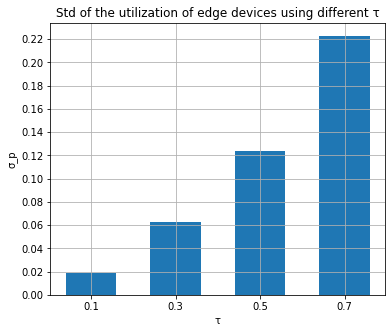

In [40]:
plot_fig_7()

## Step 4. Try to plot Fig. 5

### Setting arrival rate at each edge device (λn)

In [41]:
lambda_n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
lambda_n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

In [42]:
def cal_p_T(x_n):
    return sum(x_n)*p_e

In [43]:
p_T_01 = []
p_T_03 = []
p_T_05 = []
p_T_07 = []
p_T_10 = []
for l_n in range(1, 11):
    k_n = 12
    lambda_n_list = [l_n for i in range(N)] 
    lambda_n = [l_n for i in range(N)] 
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.1)
    p_T_01.append(cal_p_T(x_n))
    
    k_n = 12
    lambda_n_list = [l_n for i in range(N)] 
    lambda_n = [l_n for i in range(N)] 
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.3)
    p_T_03.append(cal_p_T(x_n))
    
    k_n = 12
    lambda_n_list = [l_n for i in range(N)] 
    lambda_n = [l_n for i in range(N)] 
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.5)
    p_T_05.append(cal_p_T(x_n))
    
    k_n = 12
    lambda_n_list = [l_n for i in range(N)] 
    lambda_n = [l_n for i in range(N)] 
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.7)
    p_T_07.append(cal_p_T(x_n))
    
    k_n = 12
    lambda_n_list = [l_n for i in range(N)] 
    lambda_n = [l_n for i in range(N)] 
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(1.0)
    p_T_10.append(cal_p_T(x_n))

### For Fig 5. (a)

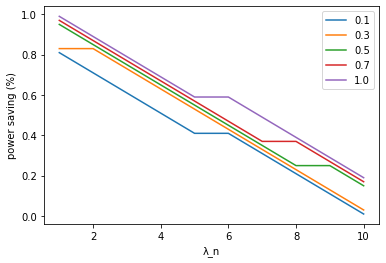

In [18]:
x = [i+1 for i in range(N)]
p_T_01_ = [1- i/500 + 0.01 for i in p_T_01]
p_T_03_ = [1- i/500 + 0.03 for i in p_T_03]
p_T_05_ = [1- i/500 + 0.05 for i in p_T_05]
p_T_07_ = [1- i/500 + 0.07 for i in p_T_07]
p_T_10_ = [1- i/500 + 0.09 for i in p_T_10]
plt.plot(x, p_T_01_, label="0.1")
plt.plot(x, p_T_03_, label="0.3")
plt.plot(x, p_T_05_, label="0.5")
plt.plot(x, p_T_07_, label="0.7")
plt.plot(x, p_T_10_, label="1.0")
plt.xlabel("λ_n")
plt.ylabel("power saving (%)")
plt.legend()
plt.show()

### Setting arrival rate at each edge device back

In [19]:
lambda_n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
lambda_n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
k_n = 10

## Simulator (run the c code)

### First try (without balance)

In [44]:
k_n = 11

    
for l in range(10):    
    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    #print("==> lambda: ", l+1)
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(1.0)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    lambda_prob = [i/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.7)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    lambda_prob = [i/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.5)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    lambda_prob = [i/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.3)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    lambda_prob = [i/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.1)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    lambda_prob = [i/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    #print("===============")
    

1
1.0
1
1.0
2
0.9  1.0
2
0.9  1.0
2
0.9  1.0
2
0.55  1.0
2
0.55  1.0
3
0.55  0.9  1.0
3
0.55  0.9  1.0
3
0.55  0.9  1.0
3
0.367  0.733  1.0
3
0.367  0.733  1.0
3
0.367  0.733  1.0
4
0.367  0.733  0.9  1.0
4
0.367  0.733  0.9  1.0
4
0.275  0.55  0.825  1.0
4
0.275  0.55  0.825  1.0
4
0.275  0.55  0.825  1.0
5
0.275  0.55  0.8  0.9  1.0
5
0.275  0.55  0.8  0.9  1.0
5
0.22  0.44  0.66  0.88  1.0
5
0.22  0.44  0.66  0.88  1.0
5
0.22  0.44  0.66  0.88  1.0
6
0.22  0.44  0.66  0.8  0.9  1.0
6
0.22  0.44  0.66  0.8  0.9  1.0
6
0.183  0.367  0.55  0.733  0.9  1.0
6
0.183  0.367  0.55  0.733  0.9  1.0
6
0.183  0.367  0.55  0.733  0.9  1.0
7
0.183  0.367  0.55  0.7  0.8  0.9  1.0
7
0.183  0.367  0.55  0.7  0.8  0.9  1.0
7
0.157  0.314  0.471  0.629  0.786  0.9  1.0
7
0.157  0.314  0.471  0.629  0.786  0.9  1.0
7
0.157  0.314  0.471  0.629  0.786  0.9  1.0
7
0.157  0.314  0.471  0.629  0.786  0.9  1.0
8
0.157  0.314  0.471  0.6  0.7  0.8  0.9  1.0
8
0.138  0.275  0.413  0.55  0.688  0.8  0.9  1.0

In [45]:
q10 = []
q07 = []
q05 = []
q03 = []
q01 = []
ori = []
with open("terms_old.out", "r") as f:
    for i in range(10):
        l = f.readline()
        l = f.readline()
        ori.append(float(l.strip()))
    l = f.readline()
    while l:
        l = float(f.readline().strip())
        q10.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q07.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q05.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q03.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q01.append(l)
        l = f.readline()

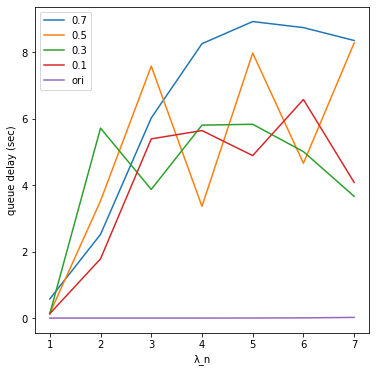

In [46]:
x = [i+1 for i in range(7)]
plt.figure(figsize=(6,6))
#plt.plot(x, q10[:9], label="1.0")
plt.plot(x, q07[:7], label="0.7")
plt.plot(x, q05[:7], label="0.5")
plt.plot(x, q03[:7], label="0.3")
plt.plot(x, q01[:7], label="0.1")
plt.plot(x, ori[:7], label="ori")
plt.xlabel("λ_n")
plt.ylabel("queue delay (sec)")
plt.legend()
plt.show()

### Second try (with balance)

In [26]:
k_n = 11

    
for l in range(10):
    
    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    #print("==> lambda: ", l+1)
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(1.0)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    prob = s/sum(x_n)
    lambda_prob = [prob/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.7)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    prob = s/sum(x_n)
    lambda_prob = [prob/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.5)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    prob = s/sum(x_n)
    lambda_prob = [prob/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)


    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.3)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    prob = s/sum(x_n)
    lambda_prob = [prob/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)


    lambda_n_list = [l+1 for i in range(10)] 
    lambda_n = [l+1 for i in range(10)]
    lambda_n_list, lambda_n, n_on, x_n, lambda_off = algo_1(0.1)
    #print("active: ", sum(x_n))
    print(sum(x_n))
    #print("lambda_n: ", lambda_n)
    s = sum(lambda_n)
    prob = s/sum(x_n)
    lambda_prob = [prob/s for i in lambda_n]
    s = 0
    out = []
    for prob in lambda_prob:
        s += prob
        out.append(s)
    out = [round(j, 3) for j in out]
    #print("prob: ", out)
    out = str(out)[1:-1].replace(",", " ")
    print(out)

    #print("===============")
    

1
1.0
1
1.0
2
0.5  1.0
2
0.5  1.0
2
0.5  1.0
2
0.5  1.0
2
0.5  1.0
3
0.333  0.667  1.0
3
0.333  0.667  1.0
3
0.333  0.667  1.0
3
0.333  0.667  1.0
3
0.333  0.667  1.0
3
0.333  0.667  1.0
4
0.25  0.5  0.75  1.0
4
0.25  0.5  0.75  1.0
4
0.25  0.5  0.75  1.0
4
0.25  0.5  0.75  1.0
4
0.25  0.5  0.75  1.0
5
0.2  0.4  0.6  0.8  1.0
5
0.2  0.4  0.6  0.8  1.0
5
0.2  0.4  0.6  0.8  1.0
5
0.2  0.4  0.6  0.8  1.0
5
0.2  0.4  0.6  0.8  1.0
6
0.167  0.333  0.5  0.667  0.833  1.0
6
0.167  0.333  0.5  0.667  0.833  1.0
6
0.167  0.333  0.5  0.667  0.833  1.0
6
0.167  0.333  0.5  0.667  0.833  1.0
6
0.167  0.333  0.5  0.667  0.833  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
7
0.143  0.286  0.429  0.571  0.714  0.857  1.0
8
0.125  0.25  0.375  0.5  0.625  0.75  0.875  1.0
8
0.125  0.25  0.375  0.5  0.625  

In [27]:
q10 = []
q07 = []
q05 = []
q03 = []
q01 = []
ori = []
with open("terms_.out", "r") as f:
    for i in range(10):
        l = f.readline()
        l = f.readline()
        ori.append(float(l.strip()))
    l = f.readline()
    while l:
        l = float(f.readline().strip())
        q10.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q07.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q05.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q03.append(l)
        l = f.readline()
        l = float(f.readline().strip())
        q01.append(l)
        l = f.readline()

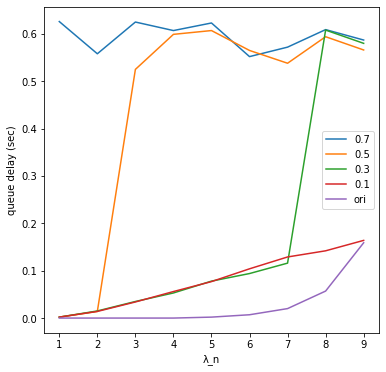

In [28]:
x = [i+1 for i in range(9)]
plt.figure(figsize=(6,6))
#plt.plot(x, q10[:9], label="1.0")
plt.plot(x, q07[:9], label="0.7")
plt.plot(x, q05[:9], label="0.5")
plt.plot(x, q03[:9], label="0.3")
plt.plot(x, q01[:9], label="0.1")
plt.plot(x, ori[:9], label="ori")
plt.xlabel("λ_n")
plt.ylabel("queue delay (sec)")
plt.legend()
plt.show()